# Data Analytics I

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset.
(https://www.kaggle.com/c/boston-housing).

The Boston Housing dataset contains information about various
houses in Boston through different parameters. 

There are 506 samples
and 14 feature variables in this dataset.

## 1. Importing all the required Python Libraries.

In [939]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading the Dataset into pandas’ data frame.

In [940]:
df=pd.read_csv('data_boston_housing.csv')

### 2.1 Dimesnions of Dataset

In [941]:
df.shape

(506, 14)

### 2.2 Variable Description and their type

In [942]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Important Columns:

1. crim : This gives crime rate by town

2. zn : this is the proportion of residential land zone 

3. indus: non retail business acre per town 

4. rm : avg no of rooms per dwelling

5. ptratio :	Pupil-teacher ratio by town

6. dis:	Weighted distance to employment centers

7. nox :nitrogen o2 concentration

8. lstat:% lower status population

9.medv: Median Value of owner-occupied homes [Target Variable ]

### 2.3 Description

In [943]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Observations :

1.Some towns have  extreme crime rate like 88.97%

2.Nitrogen Oxide (No2) ranges from 0.38 to 0.87, with a mean=0.55.
Thus almost all towns have moderate air pollution.

3.Rooms:Most houses have 3 or 4 to 6or 7 rooms 

4.Age of Property : Youngest house on Sale is 2.9 yrs old and mean age is 68 , thus this indicates towns have old building

5.dis (Distance to Employment Centers): Wide range (min=1.13, max=12.12), meaning some homes are very far from workplaces, while others are close.

6.ptratio (Pupil-Teacher Ratio in Schools)	mean=18.45, ranging from 12.6 to 22.0, indicating education quality varies significantly across towns.

7.lstat (Low-income Population Percentage)	Strongly skewed (mean=12.65, max=37.97). Some areas have very high poverty rates, while others are wealthy.

8.medv (Median House Price - Target Variable)	mean=22.53 (i.e., $22,530)


## 3.Data Preprocessing

### 3.1. Scanning all variables for missing values and inconsistencies.

In [944]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

No Null value exists in Boston Housing dataset

## 4. Data Visualization to understand and identify key features 

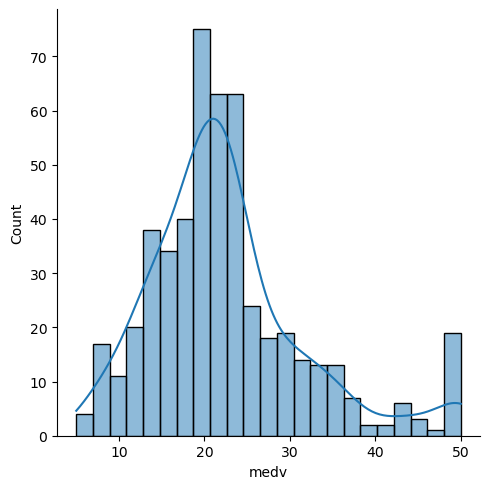

In [945]:
sns.displot(data=df.medv, kde=True)

Observations:

The distribution shows that most home values are concentrated between 10 and 30 (thousand dollars),

with a peak around 20.

There are fewer properties as the home values increase, particularly at higher price ranges.

### 4.1 Correlation Heatmap

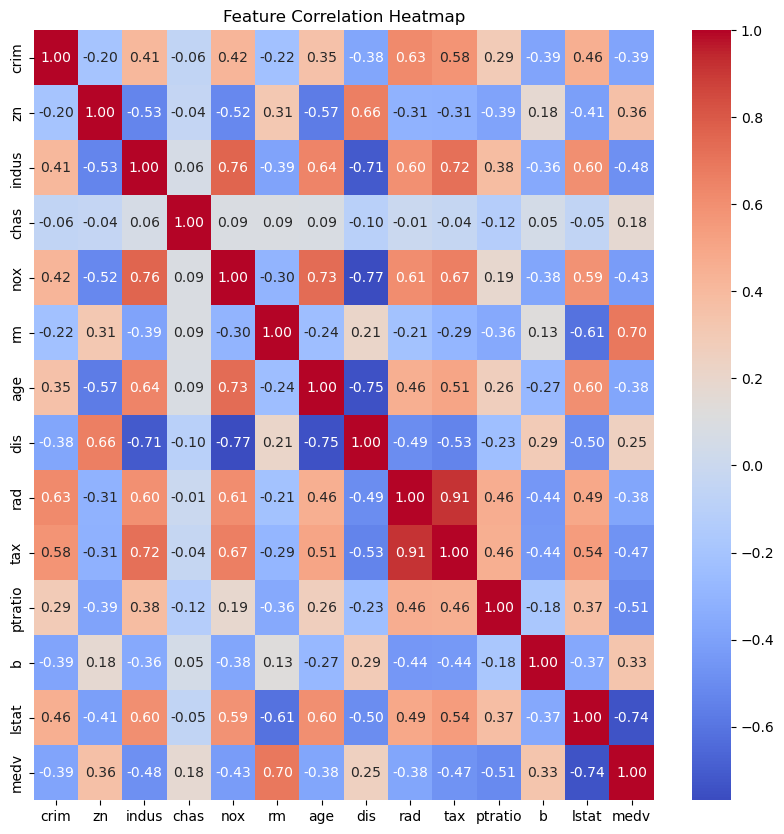

In [946]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

+1 (Red) → Strong positive correlation (as one value increases, the other increases).

-1 (Blue) → Strong negative correlation (as one value increases, the other decreases).

0 (White) → No correlation (features are independent).


FINDINGS:

Positive Correlations 

1.indus and nox correlate to each other(0.76) because more industrial areas equals more pollution

2.more radial access highway correlates to higher poperty tax

3.rm and medv correlate at 0.70 , more rooms higher prices 


Negative Correlations 

1.as lower status population increases the prices of houses lower 

2.more industrial land means less distance from job

3.ptratio & medv : more students per teacher -> crowded classes in schools -> less edu resources because of school situated in poverty area thus lower house prices 

### Finding features that have influence on Price [Medv]

rm (rooms per dwelling )- > 0.70 -> More rooms = More expensive the house is 

lstat (lower income population) ->-0.74-> The poorer the neighbourhood is ,the inexpensive the houses are

ptratio(pupil to student ratio)->-0.51->Lower Quality  schools are situated in poor neghbourhoods -> Thus leading to lack of demand for those houses 

tax->-0.47-> the more the tax is ,the less their demand will be


### Checking Correlation with Medv 

In [947]:
corr_with_medv = df.corr()['medv']
print(corr_with_medv)

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64


In [948]:
# features_to_drop = corr_with_medv[abs(corr_with_medv) < 0.3].index.to_list()
# print(features_to_drop)

In [949]:
# # Drop weakly correlated features
# df_cleaned = df.drop(columns=['chas', 'dis'])
# df=df_cleaned

In [950]:
df.shape

(506, 14)

## 5. Identifying Outliers and Removing them

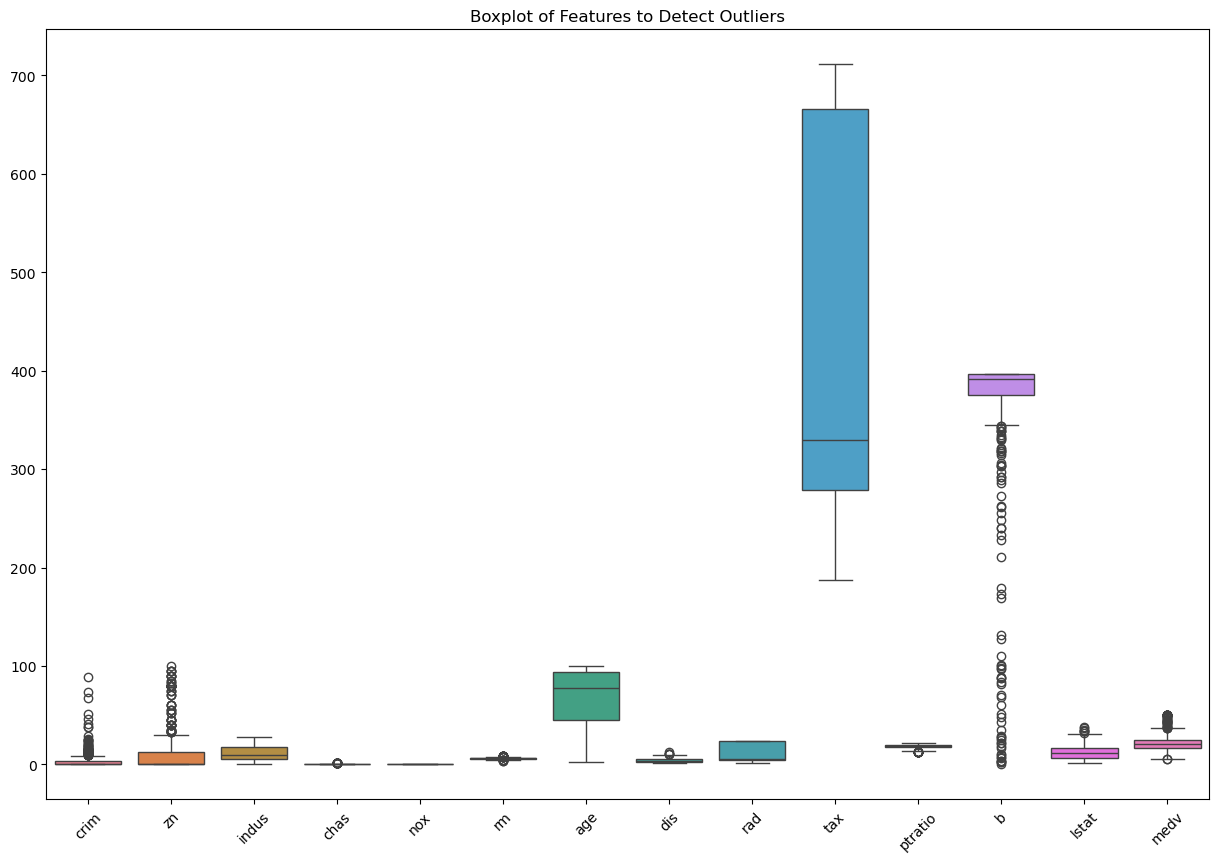

In [951]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

###  Removing Outliers 

In [952]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
df['mean_scores'] = df[[col for col in df.columns]].mean(axis=1)
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
outliers = []
df['z_score'] = zscore(df['mean_scores'])
outliers = df[abs(df['z_score']) > 2]

In [953]:
df = df[abs(df['z_score']) < 2]
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv,mean_scores,z_score
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222,0.303355,-0.566985
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889,0.238052,-0.840744
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000,0.220060,-0.916169
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111,0.167963,-1.134566
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333,0.189974,-1.042293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,0.893617,0.987619,0.219095,0.386667,0.268921,-0.711338
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,0.893617,1.000000,0.202815,0.346667,0.281868,-0.657060
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,0.893617,1.000000,0.107892,0.420000,0.302324,-0.571310
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,0.893617,0.991301,0.131071,0.377778,0.293926,-0.606514


### 7.Making Predictions 

### 7.1 Split Data for Training & Testing

In [954]:
from sklearn.model_selection import train_test_split

X = df.drop(df[['mean_scores','z_score','medv']],axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print(df.shape)

Training set size: (392, 13)
Testing set size: (99, 13)
(491, 16)


### 7.2 Training  Linear Regression Model

In [955]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [956]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared Score (R²): {r2}")


Mean Absolute Error (MAE): 0.0686428434757032
Mean Squared Error (MSE): 0.008345815414948615
R-Squared Score (R²): 0.7373368564712024


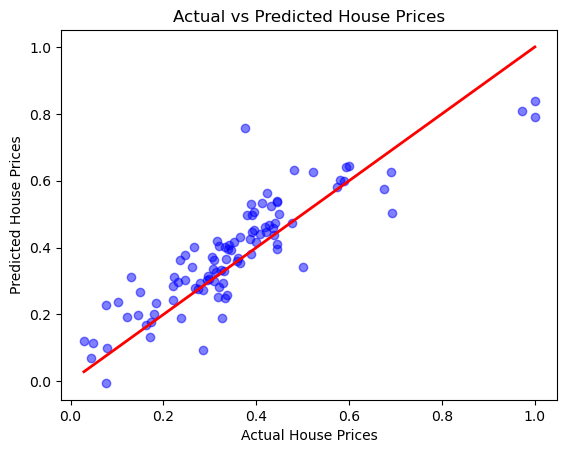

In [957]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)

plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
